In [1]:
library(ggplot2)
library(mgcv)

Loading required package: nlme

This is mgcv 1.8-31. For overview type 'help("mgcv-package")'.



# C3M4 Peer Reviewed Assignment

### Outline:
The objectives for this assignment:

1. Observe the difference between GAMs and other regression models on simulated data.
2. Review how to plot and interpret the coefficient linearity for GAM models.

General tips:

1. Read the questions carefully to understand what is being asked.
2. This work will be reviewed by another human, so make sure that you are clear and concise in what your explanations and answers.

In [2]:
# Load packages
library(ggplot2)
library(mgcv)

# Problem 1: GAMs with Simulated Data

In this example, we show how to check the validity of a generalized additive model (GAM) (using the `gam()` function) using simulated data. This allows us to try and understand the intricacies of `gam()` without having to worry about the context of the data. 

### 1. (a) Simulate the Data

Let $n = 200$. First, construct three predictor variables. The goal here is to construct a GAM with different types of predictor terms (e.g., factors, continuous variables, some that will enter linearly/parametrically, some that enter transformed).

1. x1: A continuous predictor that, we will suppose has a nonlinear relationship with the response.
2. x2: A categorical variable with three levels: `s`, `m`, and `t`.
3. x3: A categorical variable with two levels: `TRUE` and `FALSE`.

Then, make the response some nonlinear/nonparametric function of $\mathbf{x}$. For our case, use: $$\log(\mu_i) = \beta_1 + \sin(0.5x_{i,1}^2) - x_{i,2} + x_{i,3}$$ This model is a Poisson GAM. In a realworld situation, we wouldn't know this functional relationship and would estimate it. Other terms are modeled parametrically. The response has normal noise.

Note that:

1. The construction of $\boldsymbol\mu = (\mu_1,...,\mu_n)^T$ has the linear predictor exponentiated, because of the nature of the link function. 
2. We use $\boldsymbol\mu$ to construct $\mathbf{y}  = (y_1,...,y_n)^T $. The assumption for Poisson regression is that the random variable $Y_i$ that generates $y_i$ is Poisson with mean $\mu_i$. 
3. `as.integer(as.factor(VARIABLE))` converts the labels of VARIABLE to 1, 2, 3,.. so that we can construct the relationship for these factors.

Plot the relationship of $\mathbf{y}$ to each of the predictors. **Then, split the data into a training (`train_sim`) and test (`test_sim`) set**.

In [3]:
set.seed(0112358)
# n = number of data points
n = 200


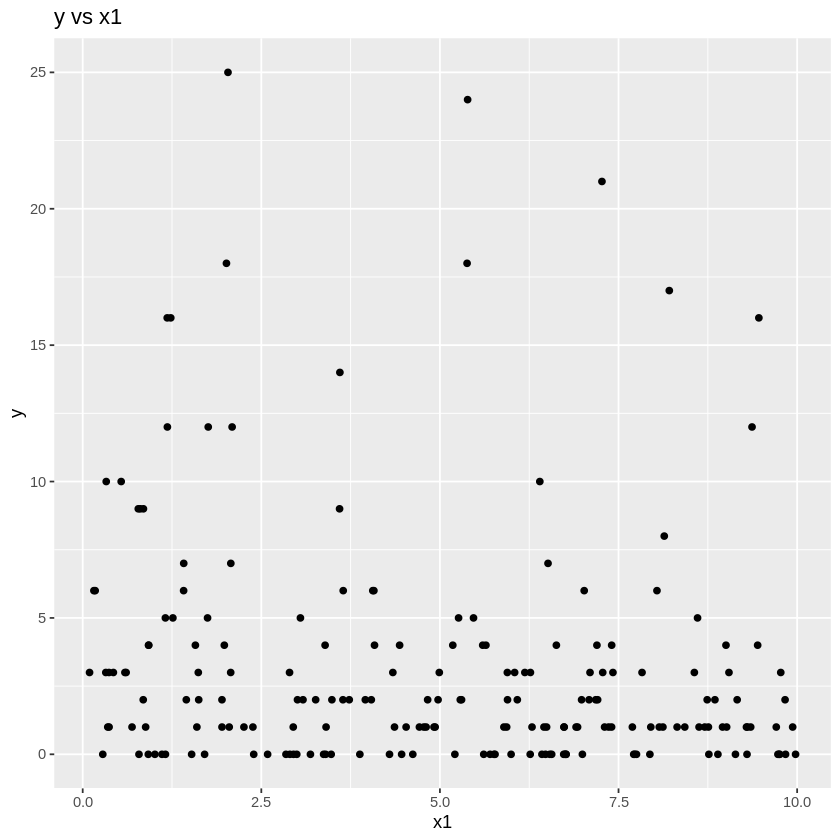

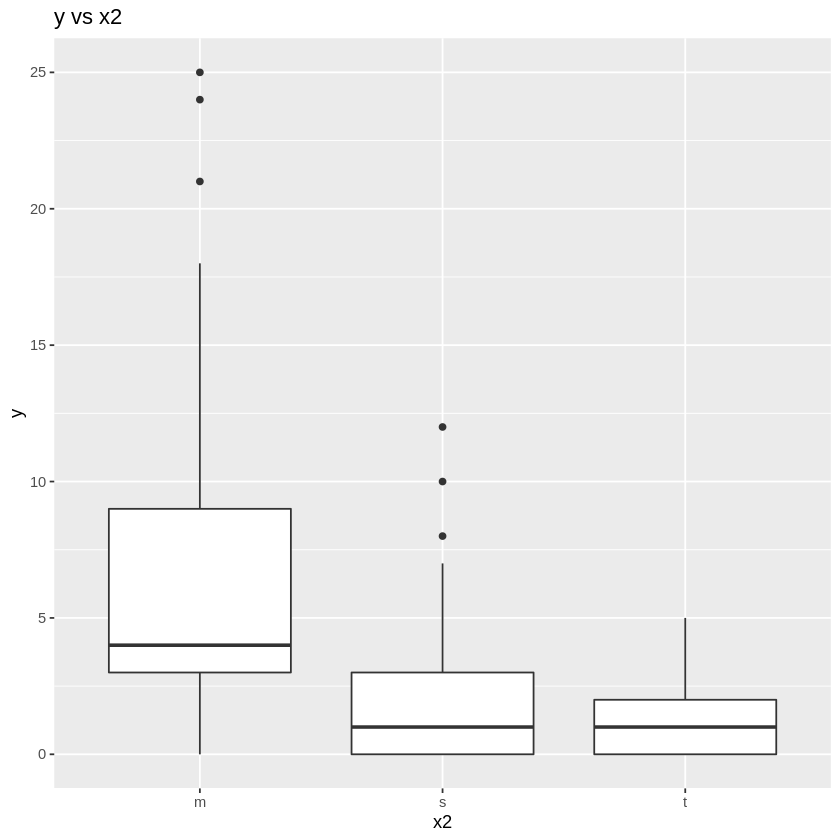

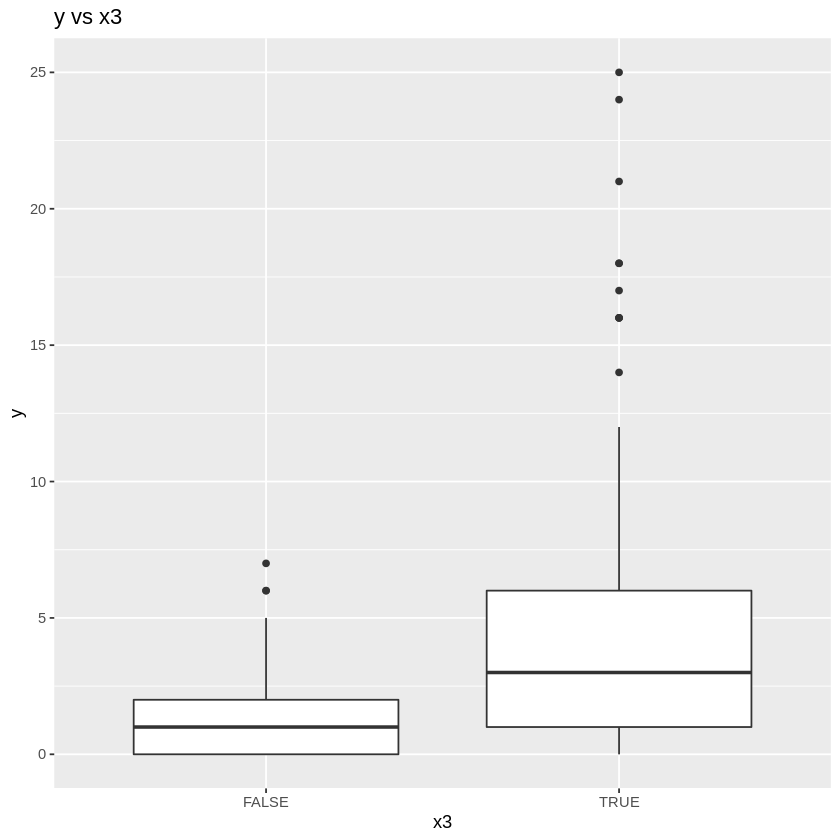

In [4]:
# Simulate predictors
x1 <- runif(n, 0, 10) # Continuous predictor
x2 <- as.factor(sample(c('s', 'm', 't'), n, replace = TRUE)) # Categorical with three levels
x3 <- as.factor(sample(c(TRUE, FALSE), n, replace = TRUE)) # Categorical with two levels

# Convert categorical variables to numeric for constructing the response
x2_numeric <- as.integer(as.factor(x2))
x3_numeric <- as.integer(as.factor(x3))

# Construct the response variable
mu <- exp(1 + sin(0.5 * x1^2) - x2_numeric + x3_numeric)
y <- rpois(n, mu)

# Combine into a data frame
data_sim <- data.frame(x1, x2, x3, y)

# Plot relationships
ggplot(data_sim, aes(x = x1, y = y)) + geom_point() + ggtitle("y vs x1")
ggplot(data_sim, aes(x = x2, y = y)) + geom_boxplot() + ggtitle("y vs x2")
ggplot(data_sim, aes(x = x3, y = y)) + geom_boxplot() + ggtitle("y vs x3")

In [5]:
# Split the data into training and testing sets
set.seed(123)
train_indices <- sample(1:n, size = 0.7 * n)
train_sim <- data_sim[train_indices, ]
test_sim <- data_sim[-train_indices, ]


### 1. (b) Other Regression Models

Before jumping straight into GAMs, let's test if other regression models work. What about a regular linear regression model with ordinary least squares, and a generalized linear model for Poisson regression?

First fit a linear regression model to your `train_sim` data. We know that all of the predictors were used to make the response, but are they all significant in the linear regression model? Explain why this may be.

Then fit a Generalize Linear Model (GLM) to the `train_sim` data. Plot three diagnostic plots for your GLM:

1. Residual vs. log(Fitted Values)
2. QQPlot of the Residuals
3. Actual Values vs. Fitted Values

Using these plots, determine whether this model is a good fit for the data. Make sure to explain your conclusions and reasoning.


Call:
lm(formula = y ~ x1 + x2 + x3, data = train_sim)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.0095 -2.2387 -0.0781  1.2063 16.1126 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   5.5981     0.8180   6.844 2.46e-10 ***
x1           -0.1373     0.1036  -1.326    0.187    
x2s          -4.4069     0.7887  -5.587 1.22e-07 ***
x2t          -5.5264     0.7304  -7.566 5.35e-12 ***
x3TRUE        3.5686     0.6180   5.775 5.06e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.627 on 135 degrees of freedom
Multiple R-squared:  0.4448,	Adjusted R-squared:  0.4283 
F-statistic: 27.04 on 4 and 135 DF,  p-value: < 2.2e-16



Call:
glm(formula = y ~ x1 + x2 + x3, family = poisson, data = train_sim)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.3909  -1.2038  -0.4111   0.7054   3.7690  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  1.20796    0.13247   9.119   <2e-16 ***
x1          -0.03474    0.01560  -2.227    0.026 *  
x2s         -1.09054    0.12649  -8.621   <2e-16 ***
x2t         -1.83780    0.15004 -12.249   <2e-16 ***
x3TRUE       1.27528    0.11674  10.924   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 724.25  on 139  degrees of freedom
Residual deviance: 285.44  on 135  degrees of freedom
AIC: 591.78

Number of Fisher Scoring iterations: 5


`geom_smooth()` using formula 'y ~ x'



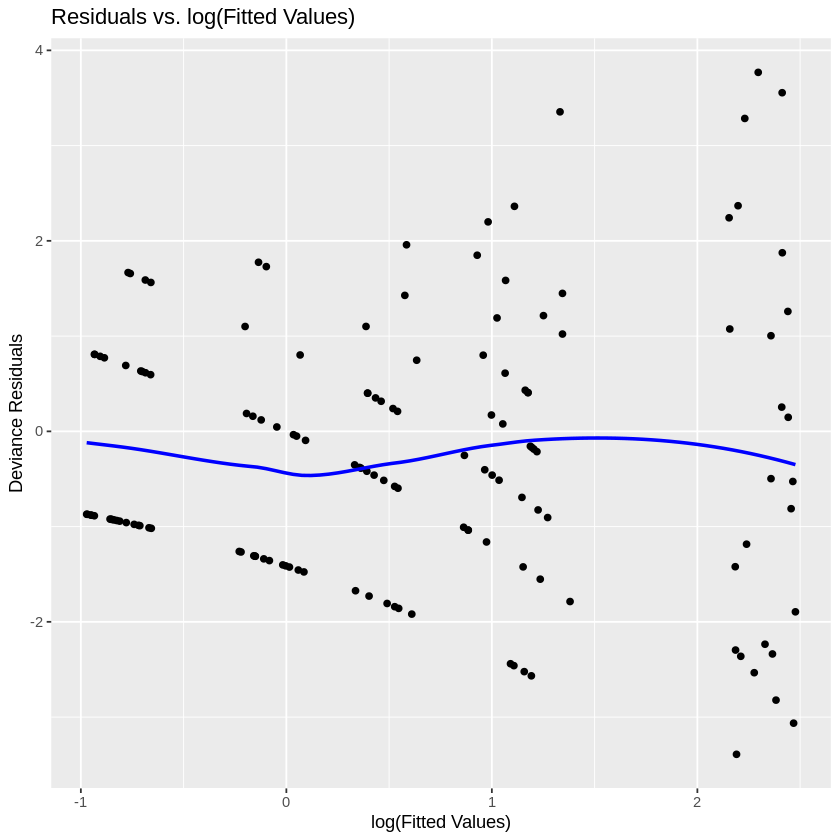

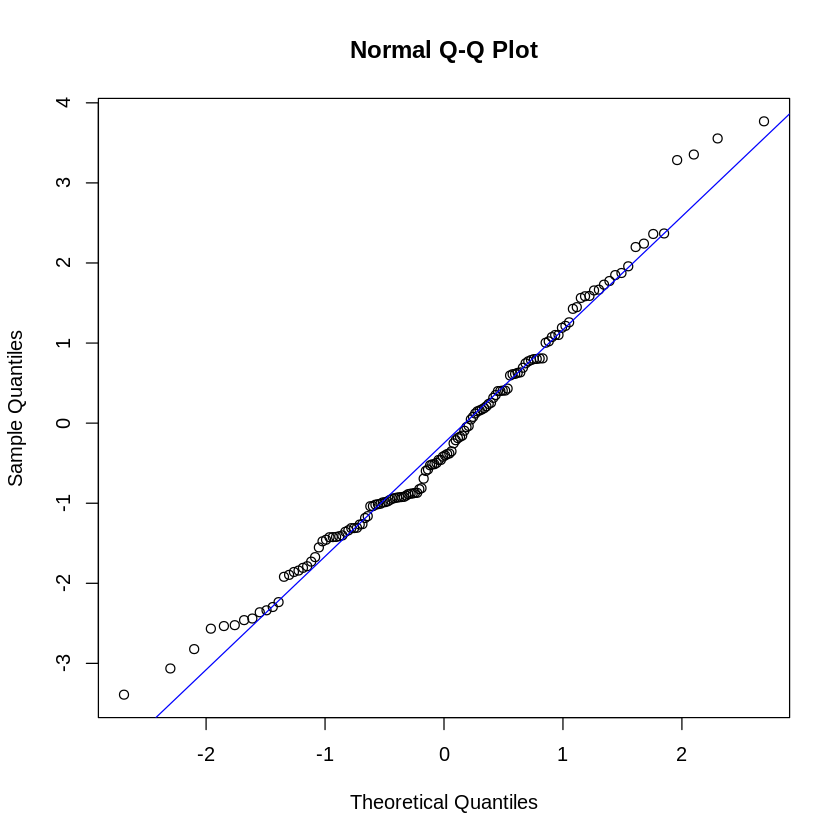

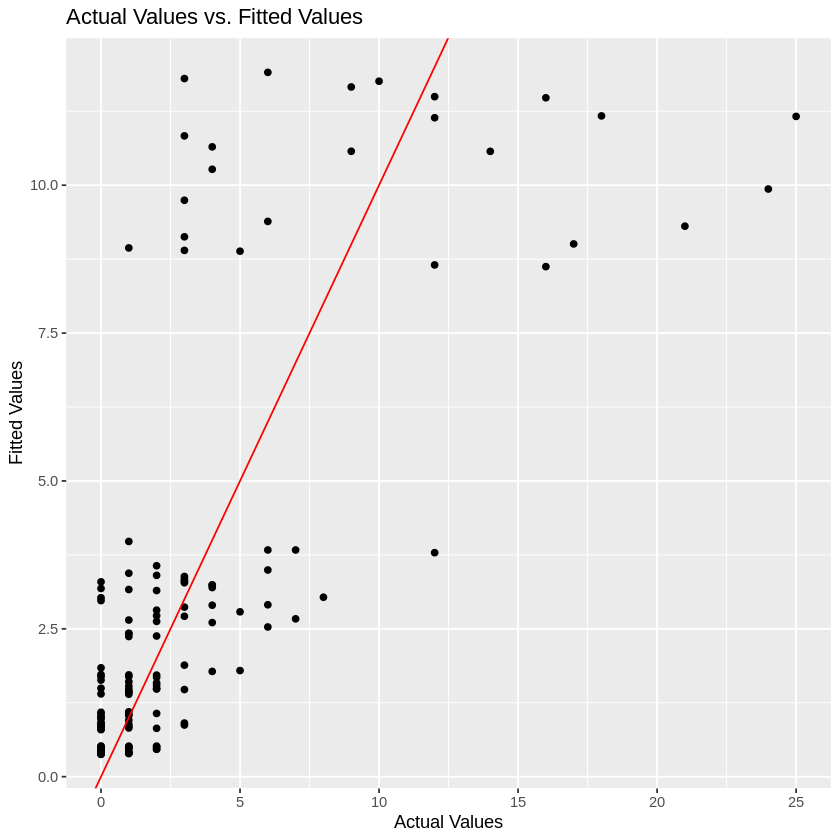

In [6]:
# Fit a LM model to the data
lm_model <- lm(y ~ x1 + x2 + x3, data = train_sim)
summary(lm_model)

# Fit a GLM model to the data
glm_model <- glm(y ~ x1 + x2 + x3, family = poisson, data = train_sim)
summary(glm_model)

#residual plot
glm_fitted <- log(fitted(glm_model))
glm_residuals <- residuals(glm_model, type = "deviance")

ggplot(data = data.frame(glm_fitted, glm_residuals), aes(x = glm_fitted, y = glm_residuals)) +
  geom_point() +
  geom_smooth(method = "loess", color = "blue", se = FALSE) +
  labs(title = "Residuals vs. log(Fitted Values)", x = "log(Fitted Values)", y = "Deviance Residuals")


## qqplot
qqnorm(glm_residuals)
qqline(glm_residuals, col = "blue")

#fitted vs actual

glm_fitted_values <- fitted(glm_model)
actual_values <- train_sim$y

ggplot(data = data.frame(actual_values, glm_fitted_values), aes(x = actual_values, y = glm_fitted_values)) +
  geom_point() +
  geom_abline(intercept = 0, slope = 1, color = "red") +
  labs(title = "Actual Values vs. Fitted Values", x = "Actual Values", y = "Fitted Values")

<strong>
    
Based on these diagnostic plots, it appears that the GLM does not provide a good fit for the data:

- Residuals vs. Fitted Values: The presence of patterns in the residuals suggests that the model is not capturing all the underlying trends in the data.
- QQ Plot: The deviations from the reference line indicate that the residuals are not normally distributed, which is a sign of model misspecification.
- Actual vs. Fitted Values: The wide scatter and deviation from the reference line suggest poor predictive performance.

<strong>

### 1. (c) Looking for those GAMs

Now, it's time to see how a generalized additive model (GAM) performs! Fit a GAM to the data. Construct the same three plots for your GAM model. Do these plots look better than those of the GLM?

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



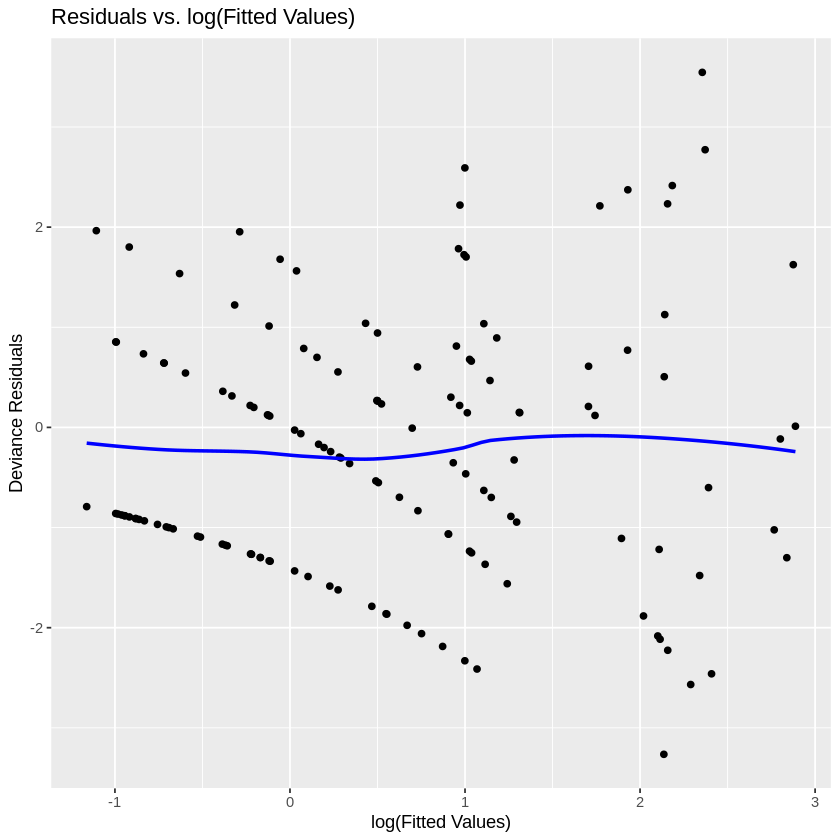

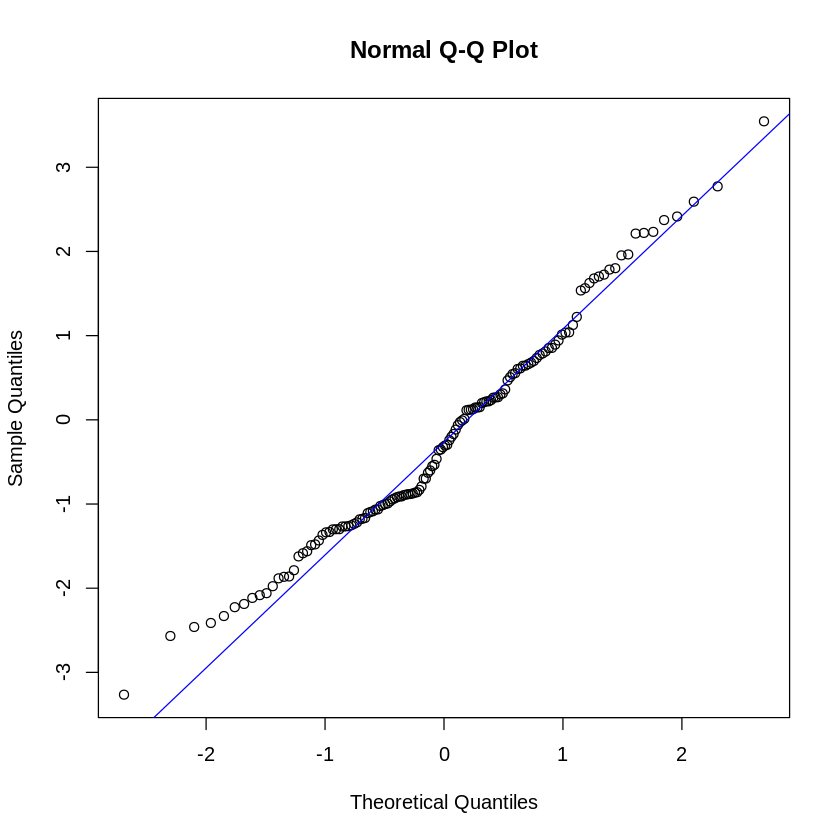

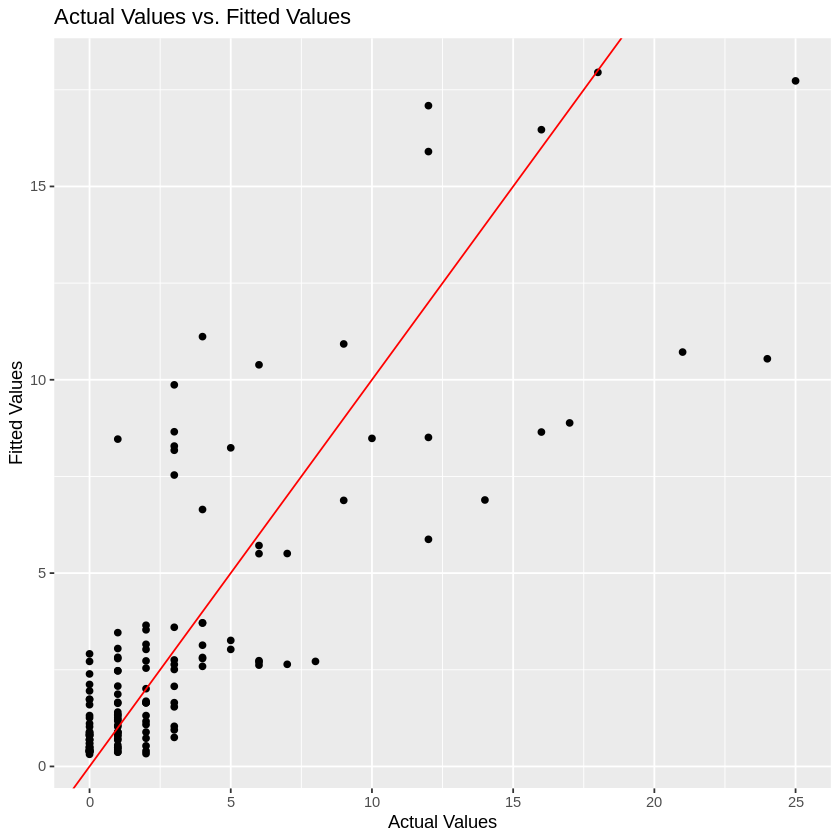

In [7]:
# Fit a GAM model to the data
gam_model <- gam(y ~ s(x1) + x2 + x3, family = poisson(link = "log"), data = train_sim)

# Construct the three specified plots



#residual vs fitted 
gam_residuals <- resid(gam_model, type = "deviance")
gam_fitted <- log(fitted(gam_model))
ggplot(data = data.frame(gam_residuals, gam_fitted), aes(x = gam_fitted, y = gam_residuals)) +
  geom_point() +
  geom_smooth(se = FALSE, color = "blue") +
  labs(x = "log(Fitted Values)", y = "Deviance Residuals", title = "Residuals vs. log(Fitted Values)")

## qqplot
qqnorm(gam_residuals)
qqline(gam_residuals, col = "blue")

#fitted vs actual

gam_actual <- train_sim$y
gam_fitted_values <- fitted(gam_model)
ggplot(data = data.frame(gam_actual, gam_fitted_values), aes(x = gam_actual, y = gam_fitted_values)) +
  geom_point() +
  geom_abline(slope = 1, intercept = 0, color = "red") +
  labs(x = "Actual Values", y = "Fitted Values", title = "Actual Values vs. Fitted Values")

**GAM is expected to perform better than the GLM for this simulated data, as it can capture nonlinear relationships and interactions that the GLM cannot.**

### 1. (d) Interpreting GAMs

We made a GAM model! However GAMs are harder to interpret than regular linear regression models. How do we determine if a GAM model was necesary? Or, in other words, how do we determine if our predictors have a linear relationship with the response?

Use the `plot.gam()` function in the mgcv library to plot the relationship between `y` and `x1`. Recall that $x_1$ entered our model as $\sin(0.5x_{i,1}^2)$, and we plotted that relationship in **1.(a)**. Does your plot confirm this relationship?

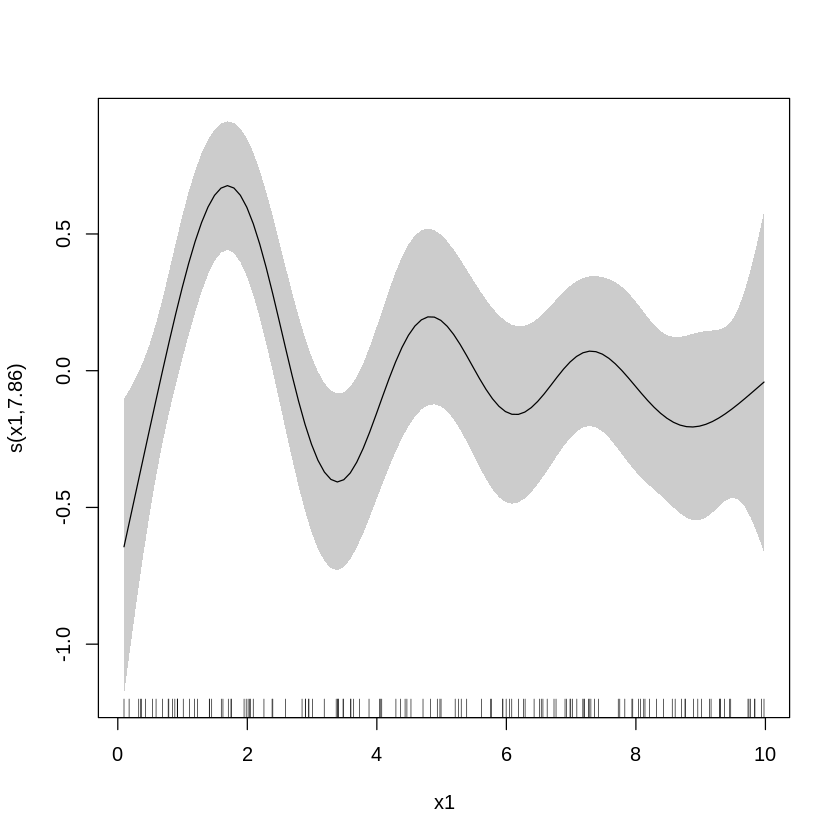

In [8]:
# Plot the relationship between y and x1 using the plot.gam function
plot(gam_model, select = 1, shade = TRUE, seWithMean = TRUE)

**The plot shows a clear non-linear relationship, it confirms that a GAM was necessary to capture this complexity.**

### 1.(e) Model comparison

Compute the mean squared prediction error (MSPE) for each of the three models above (regression model, GLM, and GAM). State which model performs based according to this metric.

Remember, the MSPE is given by 

\begin{align*}
MSPE = \frac{1}{k}\sum^k_{i=1}\left(y^\star_i - \widehat{y}^\star_i \right)^2 
\end{align*}

where $y^\star_i$ are the observed response values in the test set and $\widehat{y}^\star_i$ are the predicted values for the test set (using the model fit on the training set).

In [9]:
# Load required libraries
library(ggplot2)
library(mgcv)

# Assume train_sim and test_sim are the training and testing datasets respectively

# 1. Fit Linear Regression Model
lm_model <- lm(y ~ ., data = train_sim)

# 2. Fit Generalized Linear Model (GLM)
glm_model <- glm(y ~ ., family = poisson(link = "log"), data = train_sim)

# 3. Fit Generalized Additive Model (GAM)
gam_model <- gam(y ~ s(x1) + x2 + x3, family = poisson(link = "log"), data = train_sim)

# Predictions on test data
lm_pred <- predict(lm_model, newdata = test_sim)
glm_pred <- predict(glm_model, newdata = test_sim, type = "response")
gam_pred <- predict(gam_model, newdata = test_sim, type = "response")

# Compute MSPE for each model
mspe_lm <- mean((test_sim$y - lm_pred)^2)
mspe_glm <- mean((test_sim$y - glm_pred)^2)
mspe_gam <- mean((test_sim$y - gam_pred)^2)

# Print MSPEs
cat("MSPE for Linear Regression Model: ", mspe_lm, "\n")
cat("MSPE for Generalized Linear Model: ", mspe_glm, "\n")
cat("MSPE for Generalized Additive Model: ", mspe_gam, "\n")



MSPE for Linear Regression Model:  6.229573 
MSPE for Generalized Linear Model:  5.328323 
MSPE for Generalized Additive Model:  6.398272 


**Generalized Linear Model performs the best.**

# Problem 2 Additive models with the advertising data

The following dataset containts measurements related to the impact of three advertising medias on sales of a product, $P$. The variables are:

- `youtube`: the advertising budget allocated to YouTube. Measured in thousands of dollars;

- `facebook`: the advertising budget allocated to Facebook. Measured in thousands of dollars; and 

- `newspaper`: the advertising budget allocated to a local newspaper. Measured in thousands of dollars.

- `sales`: the value in the $i^{th}$ row of the sales column is a measurement of the sales (in thousands of units) for product $P$ for company $i$.

The advertising data treat "a company selling product $P$" as the statistical unit, and "all companies selling product $P$" as the population. We assume that the $n = 200$ companies in the dataset were chosen at random from the population (a strong assumption!).

First, we load the data, plot it, and split it into a training set (`train_marketing`) and a test set (`test_marketing`).

,youtube,facebook,newspaper,sales
,<dbl>,<dbl>,<dbl>,<dbl>
1,276.12,45.36,83.04,26.52
2,53.40,47.16,54.12,12.48
3,20.64,55.08,83.16,11.16
4,181.80,49.56,70.20,22.20
5,216.96,12.96,70.08,15.48
6,10.44,58.68,90.00,8.64


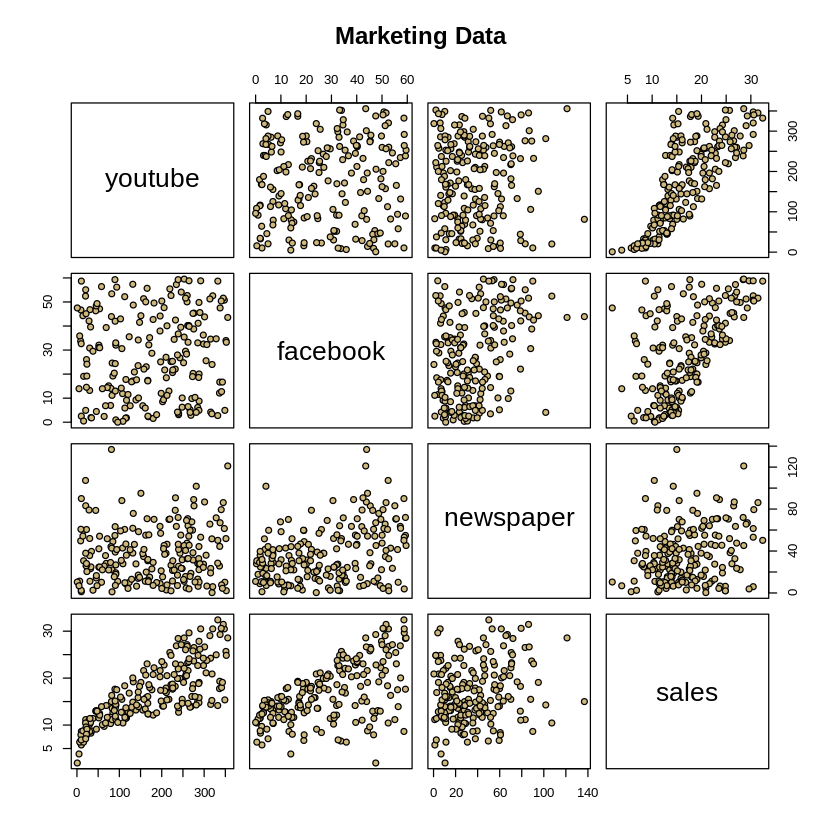

In [10]:
# Load in the data
marketing = read.csv("marketing.txt", sep = "")
head(marketing)
pairs(marketing, main = "Marketing Data", pch = 21, 
      bg = c("#CFB87C"))

In [11]:
set.seed(177) #set the random number generator seed.
n = floor(0.8 * nrow(marketing)) #find the number corresponding to 80% of the data
index = sample(seq_len(nrow(marketing)), size = n) #randomly sample indicies to be included in the training set

train_marketing = marketing[index, ] #set the training set to be the randomly sampled rows of the dataframe
test_marketing = marketing[-index, ] #set the testing set to be the remaining rows
dim(test_marketing) #check the dimensions
dim(train_marketing) #check the dimensions

[1] 40  4

[1] 160   4

**2.(a) Let's try a GAM on the marketing data!**

Note that the relationship between `sales` and `youtube` is nonlinear. This was a problem for us back in the first course in this specialization, when we modeled the data as if it were linear. In the last module, we focused on modeling the relationship between `sales` and `youtube`, omitting the other variables. Now it's time to include the additional predictors.

Using the `train_marketing` fit an additive model to the data and store it in `gam_marketing`. Produce the relevant added variable plots using `plot(gam_marketing)`. Comment on the fit of the model.


Family: gaussian 
Link function: identity 

Formula:
sales ~ s(youtube) + s(facebook) + s(newspaper)

Parametric coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  16.5743     0.1321   125.5   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Approximate significance of smooth terms:
               edf Ref.df       F p-value    
s(youtube)   6.037  7.127 201.356  <2e-16 ***
s(facebook)  1.000  1.000 481.319  <2e-16 ***
s(newspaper) 1.000  1.000   0.593   0.442    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

R-sq.(adj) =  0.929   Deviance explained = 93.3%
GCV = 2.9572  Scale est. = 2.7902    n = 160

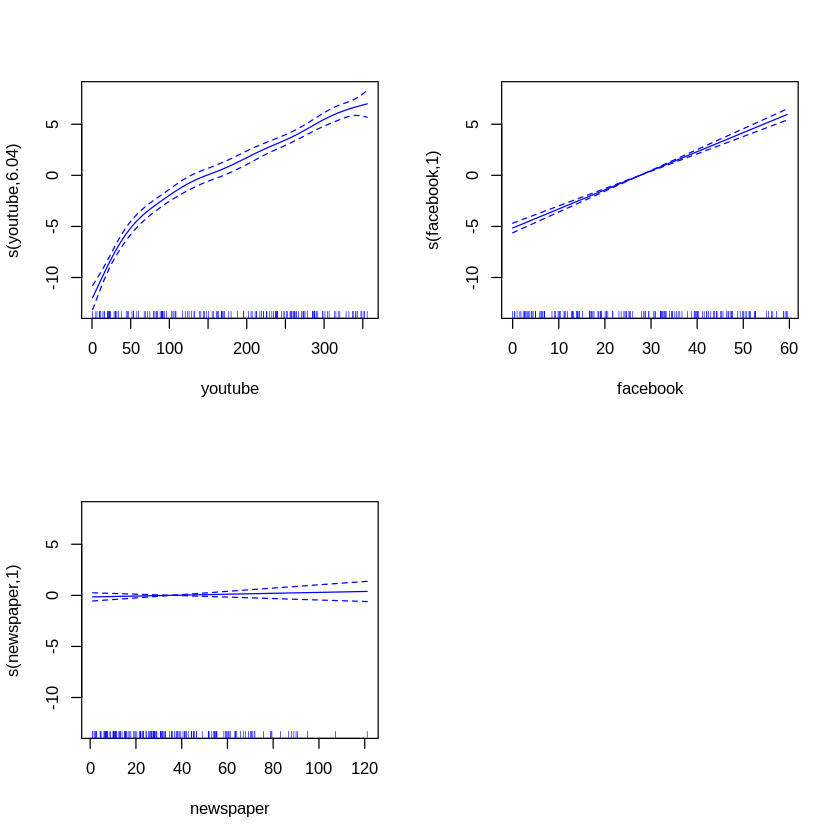

In [12]:
# Step 3: Fit the Generalized Additive Model (GAM)
gam_marketing <- gam(sales ~ s(youtube) + s(facebook) + s(newspaper), data = train_marketing)

# Step 4: Plot the model
plot(gam_marketing, pages = 1, se = TRUE, col = "blue")

# Summary of the model
summary(gam_marketing)

# Step 5: Comment on the fit
# The plots will be visual and can be interpreted based on smooth terms.

**The GAM model has successfully identified and modeled the nonlinear relationship between youtube and sales. The linear relationship for facebook and the negligible effect of newspaper are also well-represented in the model. This suggests that the GAM is a suitable choice for modeling this dataset, capturing the essential patterns in the data.**

**2.(b) Semiparametric modeling of the marketing data**

Refit the additive model based on your results from 2.(a). That is, if any predictors above should enter linearly, refit the model to reflect that. If any predictors are statistically insignificant, remove them from the model. Store your final model in `semiparametric_marketing`.


Family: gaussian 
Link function: identity 

Formula:
sales ~ s(youtube) + facebook

Parametric coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 11.352099   0.253895   44.71   <2e-16 ***
facebook     0.189085   0.007848   24.09   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Approximate significance of smooth terms:
             edf Ref.df     F p-value    
s(youtube) 5.979  7.127 200.9  <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

R-sq.(adj) =  0.929   Deviance explained = 93.2%
GCV = 2.9438  Scale est. = 2.797     n = 160

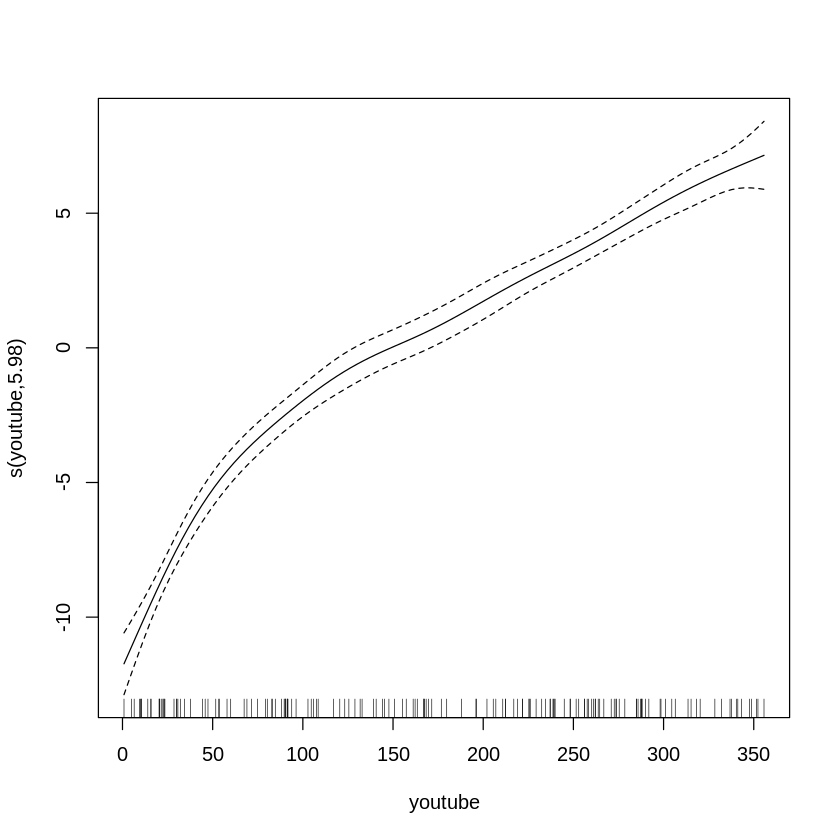

In [13]:
# Fit the semiparametric model
semiparametric_marketing <- gam(sales ~ s(youtube) + facebook, data = train_marketing)

# Summary of the final model
summary(semiparametric_marketing)

# Produce the added variable plots for the final model
plot(semiparametric_marketing, pages = 1)


**2.(c) Model comparisons**

Now, let's do some model comparisons on the test data. Compute the mean squared prediction error (MSPE) on the `test_marketing` data for the following three models:

- `gam_marketing` from 2.(a)


- `semiparametric_marketing`from 2.(b)


- `lm_marketing`, a linear regression model with `sales` is the response and `youtube` and `facebook` are predictors (fit on the `train_marketing` data).

State which model performs based according to this metric.

In [14]:
# Predictions and MSPE for gam_marketing
pred_gam <- predict(gam_marketing, newdata = test_marketing)
mspe_gam <- mean((test_marketing$sales - pred_gam)^2)
print(paste("MSPE for gam_marketing:", mspe_gam))

# Predictions and MSPE for semiparametric_marketing
pred_semi <- predict(semiparametric_marketing, newdata = test_marketing)
mspe_semi <- mean((test_marketing$sales - pred_semi)^2)
print(paste("MSPE for semiparametric_marketing:", mspe_semi))

# Fit the linear regression model
lm_marketing <- lm(sales ~ youtube + facebook, data = train_marketing)

# Predictions and MSPE for lm_marketing
pred_lm <- predict(lm_marketing, newdata = test_marketing)
mspe_lm <- mean((test_marketing$sales - pred_lm)^2)
print(paste("MSPE for lm_marketing:", mspe_lm))


[1] "MSPE for gam_marketing: 3.43820224517997"
[1] "MSPE for semiparametric_marketing: 3.29744826352071"
[1] "MSPE for lm_marketing: 4.19770116857387"


**Semiparametric_marketing has the best predictive performance on the test data**